<a href="https://colab.research.google.com/github/Aswin-Vellaichamy/Business_Metric_Analysis_for_API_Logs/blob/main/Technical_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [46]:
df = pd.read_csv('/content/app_logs - app_logs.csv')

#Basic Data Exploration

In [47]:
df.head()

,timestamp,endpoint,user_id,response_time_ms,status_code
0,2024-12-01 23:20:31,/api/search,user_25,98,200
1,2024-12-01 23:25:31,/api/recommendations,user_82,107,200
2,2024-12-01 23:30:31,/api/chat,user_89,147,200
3,2024-12-01 23:35:31,/api/search,user_12,96,200
4,2024-12-01 23:40:31,/api/search,user_15,98,200


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   timestamp         2016 non-null   object
 1   endpoint          2016 non-null   object
 2   user_id           2016 non-null   object
 3   response_time_ms  2016 non-null   int64 
 4   status_code       2016 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 78.9+ KB


In [49]:
df.describe()

,response_time_ms,status_code
count,2016.000000,2016.000000
mean,419.240575,215.714286
std,2961.986796,63.129672
min,70.000000,200.000000
25%,97.000000,200.000000
50%,117.000000,200.000000
75%,145.000000,200.000000
max,30000.000000,504.000000


# Metrics generation from the given dataset

In [51]:
# Metrics Calculation

# Average and P95 response times per endpoint
def calculate_response_times(df):
    response_stats = df.groupby('endpoint')['response_time_ms'].agg(
        average_response_time='mean',
        p95_response_time=lambda x: x.quantile(0.95)
    ).reset_index()
    return response_stats

# Error rates and types of errors
def calculate_error_rates(df):
    df['error_type'] = df['status_code'].apply(
        lambda x: 'Client Error' if 400 <= x < 500 else ('Server Error' if 500 <= x < 600 else 'None')
    )
    error_stats = df[df['error_type'] != 'None'].groupby('error_type').size().reset_index(name='count')
    total_requests = len(df)
    error_stats['error_rate'] = (error_stats['count'] / total_requests) * 100
    return error_stats

# Peak usage periods
def calculate_peak_usage(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    peak_usage = df.groupby('hour').size().reset_index(name='request_count')
    return peak_usage

# User experience metrics
def calculate_user_experience(df):
    total_requests = len(df)
    slow_requests = df[df['response_time_ms'] > 1000].shape[0]
    percentage_slow_requests = (slow_requests / total_requests) * 100
    return {
        'total_requests': total_requests,
        'slow_requests': slow_requests,
        'percentage_slow_requests': percentage_slow_requests
    }

# Additional metrics (Total requests per endpoint)
def calculate_requests_per_endpoint(df):
    endpoint_stats = df['endpoint'].value_counts().reset_index()
    endpoint_stats.columns = ['endpoint', 'request_count']
    return endpoint_stats

# Compute metrics
response_stats = calculate_response_times(df)
error_stats = calculate_error_rates(df)
peak_usage = calculate_peak_usage(df)
user_experience = calculate_user_experience(df)
requests_per_endpoint = calculate_requests_per_endpoint(df)

In [52]:
print("Response Times:")
print(response_stats)

Response Times:
               endpoint  average_response_time  p95_response_time
0             /api/chat             445.026515             235.65
1  /api/recommendations             348.311871             155.20
2           /api/search             471.608081             157.90
3     /api/user/profile             410.600806             160.00


In [53]:
print("\nError Rates:")
print(error_stats)


Error Rates:
     error_type  count  error_rate
0  Client Error     50    2.480159
1  Server Error     72    3.571429


In [54]:
print("\nRequests Per Endpoint:")
print(requests_per_endpoint)


Requests Per Endpoint:
               endpoint  request_count
0             /api/chat            528
1  /api/recommendations            497
2     /api/user/profile            496
3           /api/search            495


In [55]:

print("\nUser Experience Metrics:")
print(user_experience)


User Experience Metrics:
{'total_requests': 2016, 'slow_requests': 20, 'percentage_slow_requests': 0.992063492063492}


In [56]:
print("\nPeak Usage:")
print(peak_usage)


Peak Usage:
    hour  request_count
0      0             84
1      1             84
2      2             84
3      3             84
4      4             84
5      5             84
6      6             84
7      7             84
8      8             84
9      9             84
10    10             84
11    11             84
12    12             84
13    13             84
14    14             84
15    15             84
16    16             84
17    17             84
18    18             84
19    19             84
20    20             84
21    21             84
22    22             84
23    23             84


# Data Visualization and Analysis

**Response Time Trends Over Time**:

Average response time plotted by date.

**Error Rate Patterns**:

Hourly error rate trends.

**Endpoint Performance Comparison**:

Average response time trends for each endpoint over time.

**Peak Usage Analysis**:

Bar chart for hourly usage patterns.

**Average and P95 Response Times**:

Bar chart showing average and P95 response times per endpoint.

**Error Rates by Type**:
Bar chart for error rates by type.

**Peak Usage Periods**:

Line plot showing the number of requests per hour of the day.

**Requests Per Endpoint**:

Bar chart showing total requests per endpoint.

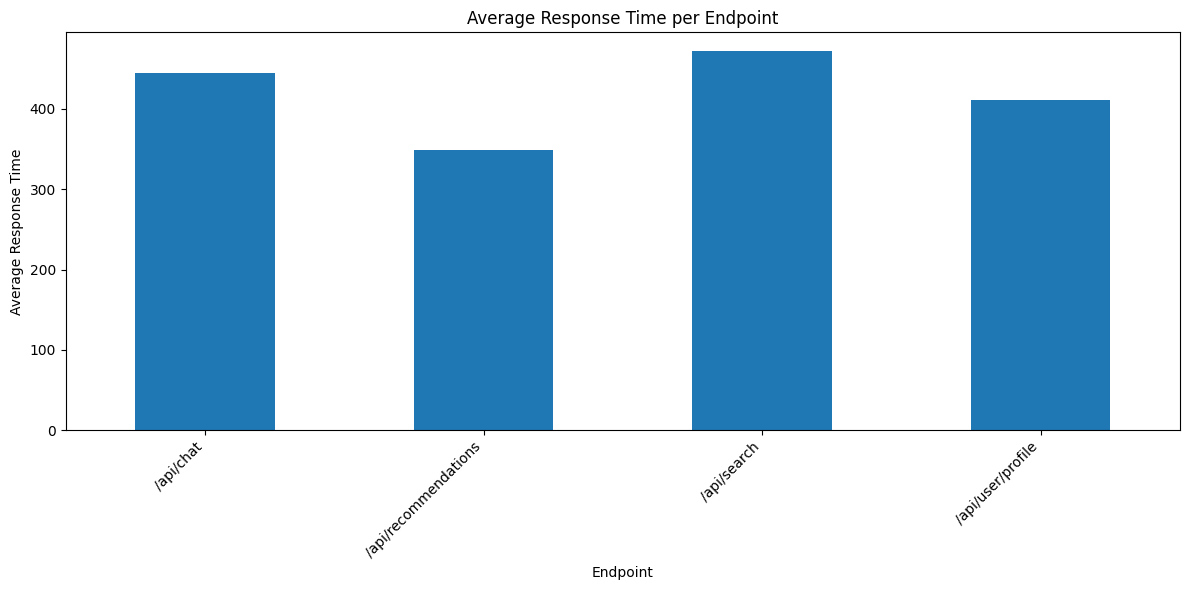

In [104]:
# Grouped bar chart for average response times
endpoint_groups = df.groupby('endpoint')['response_time_ms'].mean()
plt.figure(figsize=(12,6))
endpoint_groups.plot(kind='bar')
plt.xlabel('Endpoint')
plt.ylabel('Average Response Time')
plt.title('Average Response Time per Endpoint')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

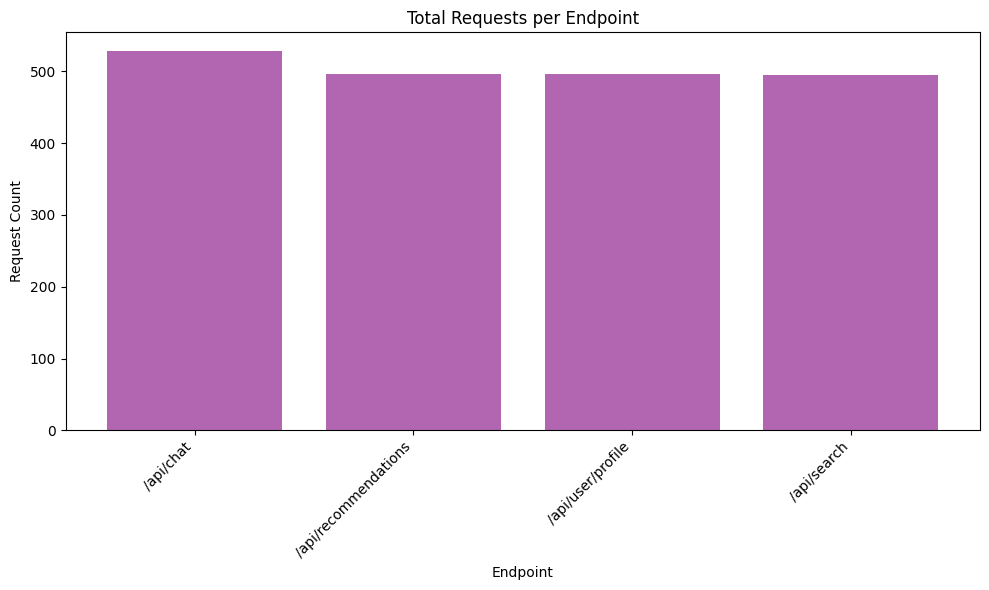

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(requests_per_endpoint['endpoint'], requests_per_endpoint['request_count'], color='purple', alpha=0.6)
plt.xlabel('Endpoint')
plt.ylabel('Request Count')
plt.title('Total Requests per Endpoint')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

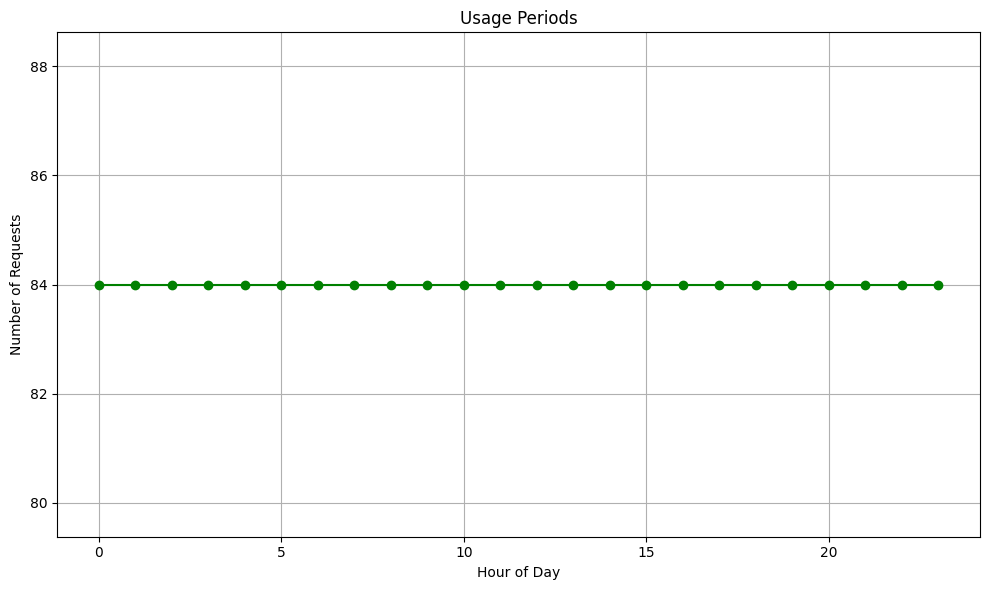

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(peak_usage['hour'], peak_usage['request_count'], marker='o', linestyle='-', color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('Usage Periods')
plt.grid()
plt.tight_layout()

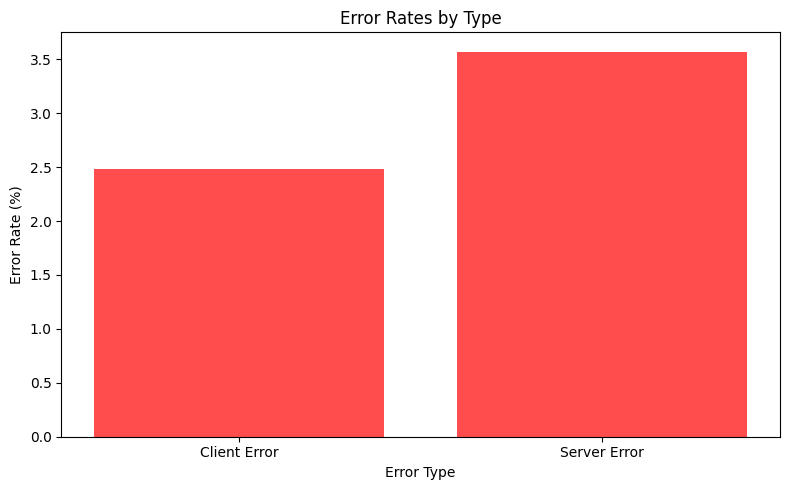

In [59]:
plt.figure(figsize=(8, 5))
plt.bar(error_stats['error_type'], error_stats['error_rate'], color='red', alpha=0.7)
plt.xlabel('Error Type')
plt.ylabel('Error Rate (%)')
plt.title('Error Rates by Type')
plt.tight_layout()

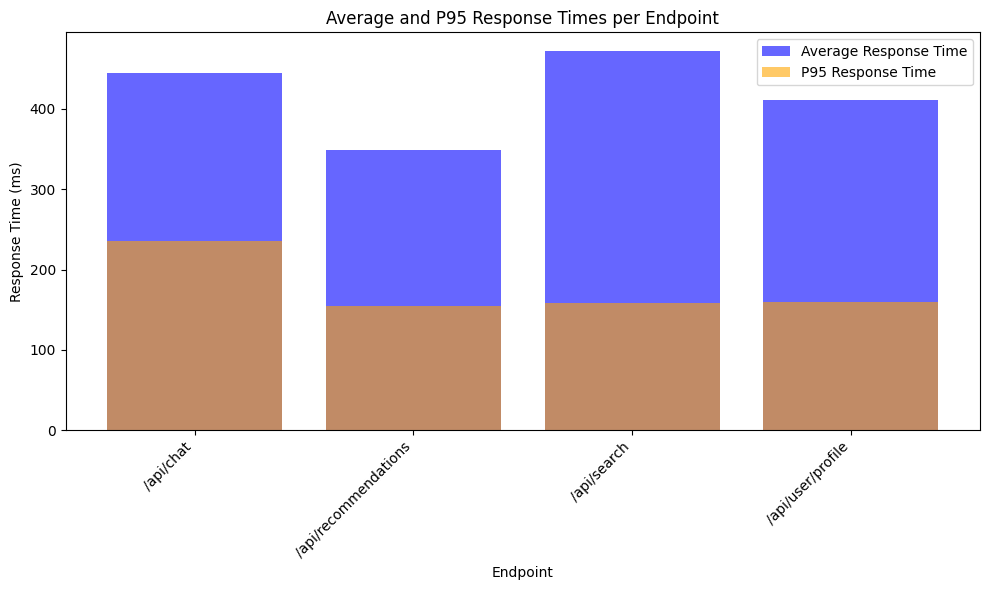

In [100]:
plt.figure(figsize=(10, 6))
plt.bar(response_stats['endpoint'], response_stats['average_response_time'], color='blue', alpha=0.6, label='Average Response Time')
plt.bar(response_stats['endpoint'], response_stats['p95_response_time'], color='orange', alpha=0.6, label='P95 Response Time')
plt.xlabel('Endpoint')
plt.ylabel('Response Time (ms)')
plt.title('Average and P95 Response Times per Endpoint')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

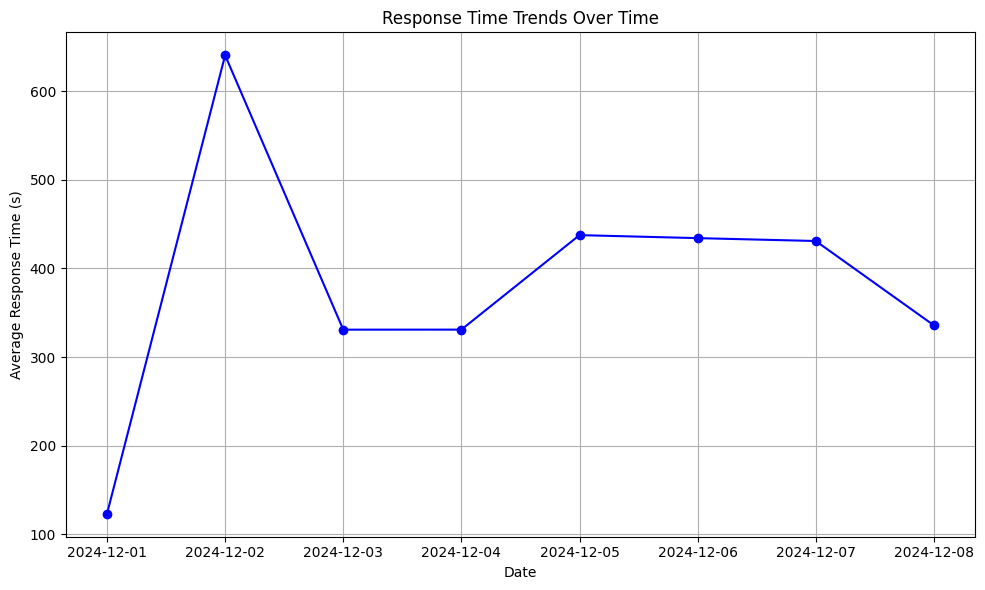

In [61]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
response_time_trends = df.groupby('date')['response_time_ms'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(response_time_trends['date'], response_time_trends['response_time_ms'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Response Time (s)')
plt.title('Response Time Trends Over Time')
plt.grid()
plt.tight_layout()

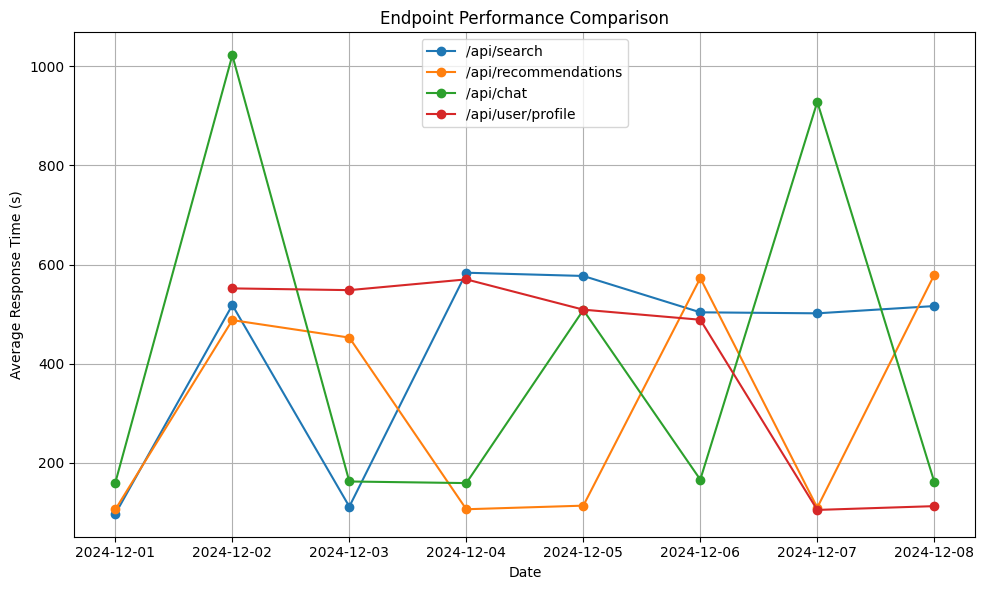

In [62]:
plt.figure(figsize=(10, 6))
for endpoint in df['endpoint'].unique():
    endpoint_data = df[df['endpoint'] == endpoint]
    endpoint_trends = endpoint_data.groupby('date')['response_time_ms'].mean().reset_index()
    plt.plot(endpoint_trends['date'], endpoint_trends['response_time_ms'], marker='o', linestyle='-', label=endpoint)
plt.xlabel('Date')
plt.ylabel('Average Response Time (s)')
plt.title('Endpoint Performance Comparison')
plt.legend()
plt.grid()
plt.tight_layout()

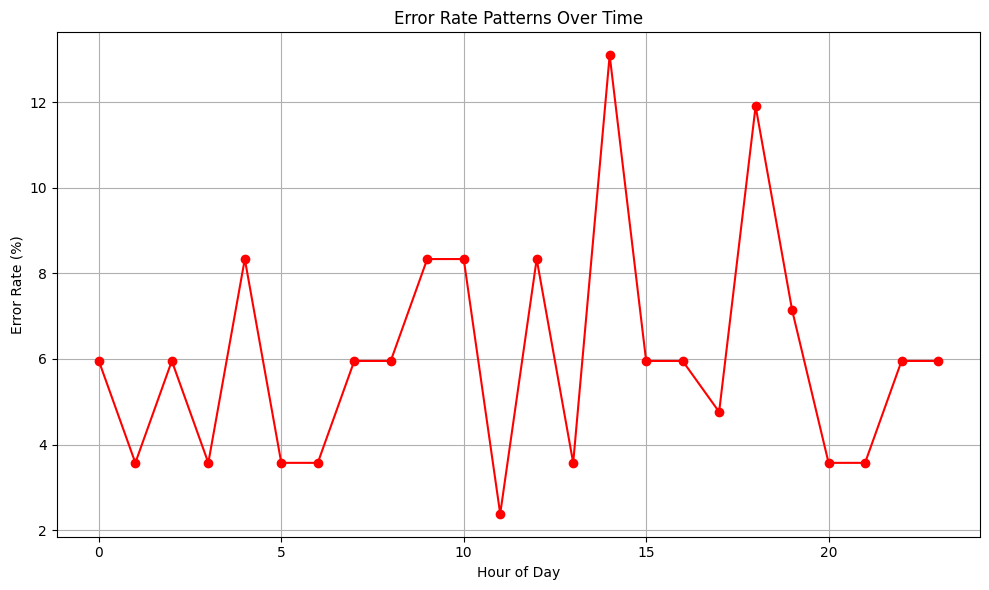

In [63]:
df['hour'] = df['timestamp'].dt.hour
hourly_error_rates = df[df['status_code'] >= 400].groupby('hour').size() / df.groupby('hour').size() * 100
hourly_error_rates = hourly_error_rates.reset_index(name='error_rate')
plt.figure(figsize=(10, 6))
plt.plot(hourly_error_rates['hour'], hourly_error_rates['error_rate'], marker='o', linestyle='-', color='red')
plt.xlabel('Hour of Day')
plt.ylabel('Error Rate (%)')
plt.title('Error Rate Patterns Over Time')
plt.grid()
plt.tight_layout()

# Anomaly Detection

In [107]:
def detect_availability_issues(df, threshold=0.95):
    endpoint_availability = df.groupby('endpoint')['status_code'].apply(
        lambda x: (x >= 200) & (x < 300)).mean()
    issues = endpoint_availability[endpoint_availability < threshold]
    return issues#.reset_index(name='availability_rate')

In [65]:
def detect_error_rate_anomalies(df, threshold=10.0):
    df['hour'] = df['timestamp'].dt.hour
    hourly_errors = df[df['status_code'] >= 400].groupby('hour').size()
    hourly_total = df.groupby('hour').size()
    hourly_error_rate = (hourly_errors / hourly_total) * 100
    anomalies = hourly_error_rate[hourly_error_rate > threshold]
    return anomalies.reset_index(name='error_rate')

In [84]:
def detect_spikes_in_response_time(df, threshold_multiplier=2.0):
    response_median = df['response_time_ms'].median()
    df['deviation_from_median'] = (df['response_time_ms'] - response_median).abs()
    threshold = response_median * threshold_multiplier
    spikes = df[df['deviation_from_median'] > threshold]
    return spikes[['timestamp', 'endpoint', 'response_time_ms']]

In [108]:
requests_per_endpoint = calculate_requests_per_endpoint(df)
response_time_spikes = detect_spikes_in_response_time(df)
error_rate_anomalies = detect_error_rate_anomalies(df)
availability_issues = detect_availability_issues(df)

In [86]:
print("\nRequests Per Endpoint:")
print(requests_per_endpoint)


Requests Per Endpoint:
               endpoint  request_count
0             /api/chat            528
1  /api/recommendations            497
2     /api/user/profile            496
3           /api/search            495


In [87]:
print("\nResponse Time Spikes:")
print(response_time_spikes)


Response Time Spikes:
    timestamp  average_response_time
0  2024-12-01             123.125000
1  2024-12-02             640.465278
2  2024-12-03             330.881944
3  2024-12-04             330.923611
4  2024-12-05             437.531250
5  2024-12-06             434.142361
6  2024-12-07             430.899306
7  2024-12-08             335.746429


In [88]:
print("\nError Rate Anomalies:")
print(error_rate_anomalies)

print("\nEndpoint Availability Issues:")
print(availability_issues)


Error Rate Anomalies:
   hour  error_rate
0    14   13.095238
1    18   11.904762

Endpoint Availability Issues:
[0.93948413]


In [92]:
def detect_spikes_with_boxplot(df):
    q1 = df['response_time_ms'].quantile(0.25)
    q3 = df['response_time_ms'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    spikes = df[(df['response_time_ms'] < lower_bound) | (df['response_time_ms'] > upper_bound)]
    return spikes[['timestamp', 'endpoint', 'response_time_ms']]

In [93]:
response_time_spikes = detect_spikes_with_boxplot(df)

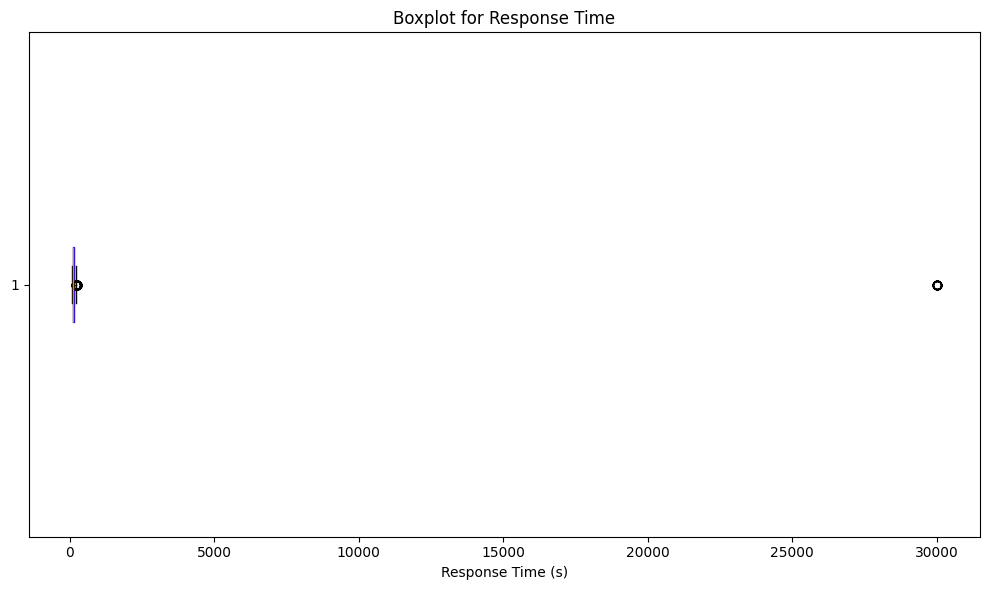

In [96]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['response_time_ms'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.xlabel('Response Time (s)')
plt.title('Boxplot for Response Time')
plt.tight_layout()

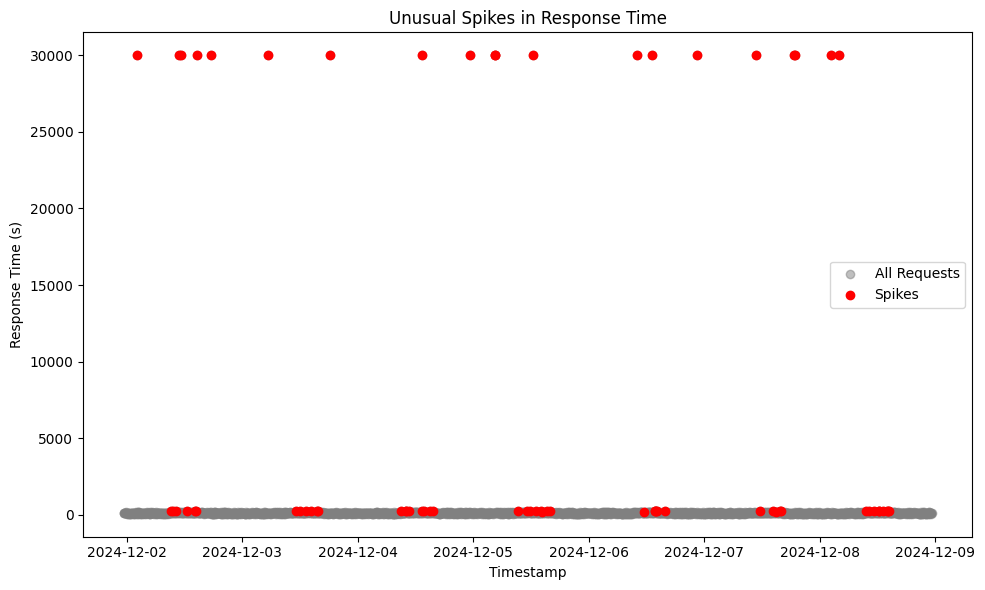

In [103]:
spikes = detect_spikes_with_boxplot(df)
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['response_time_ms'], color='gray', alpha=0.5, label='All Requests')
plt.scatter(spikes['timestamp'], spikes['response_time_ms'], color='red', label='Spikes')
plt.xlabel('Timestamp')
plt.ylabel('Response Time (s)')
plt.title('Unusual Spikes in Response Time')
plt.legend()
plt.tight_layout()